In [2]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [5]:
file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

ratings_matrix = ratings_matrix.dropna(thresh=10, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=20, axis=1)

ratings_matrix_filled = ratings_matrix.fillna(2.5)

R = ratings_matrix_filled.values

user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

k = 20
U, sigma, Vt = svds(R_demeaned, k=k)

In [6]:
print("U:\n", U)

print("V:\n", Vt.T)

U:
 [[ 0.18342462 -0.10642462  0.10837968 ...  0.0187437  -0.07538079
   0.07061891]
 [-0.00855664  0.00076158 -0.00626249 ... -0.00462038  0.02284867
   0.00721521]
 [-0.0168308  -0.00776097  0.01272007 ... -0.00081216  0.0045073
  -0.00113858]
 ...
 [ 0.09299416  0.07772072 -0.05285827 ... -0.02007788  0.04695482
   0.08706938]
 [ 0.00933199  0.00799319  0.01032508 ...  0.02687991 -0.00663922
   0.00926627]
 [-0.10713434  0.1047199  -0.0106372  ... -0.09894009  0.12644318
   0.12742731]]
V:
 [[-0.04232113 -0.06986673 -0.13226958 ...  0.09883641 -0.02679798
   0.0822674 ]
 [ 0.02041904 -0.00152139  0.04597798 ...  0.0693816   0.00981917
   0.0081885 ]
 [-0.0129985   0.00580833  0.0089396  ...  0.03138372 -0.02010968
  -0.01583294]
 ...
 [-0.02136335 -0.00175379 -0.00307768 ... -0.01005001  0.02547871
  -0.00953794]
 [ 0.01813193  0.00030914  0.01970495 ...  0.00324423  0.03702798
  -0.0059641 ]
 [-0.02146149 -0.00882556  0.00454047 ... -0.0045327   0.03975678
  -0.00434485]]


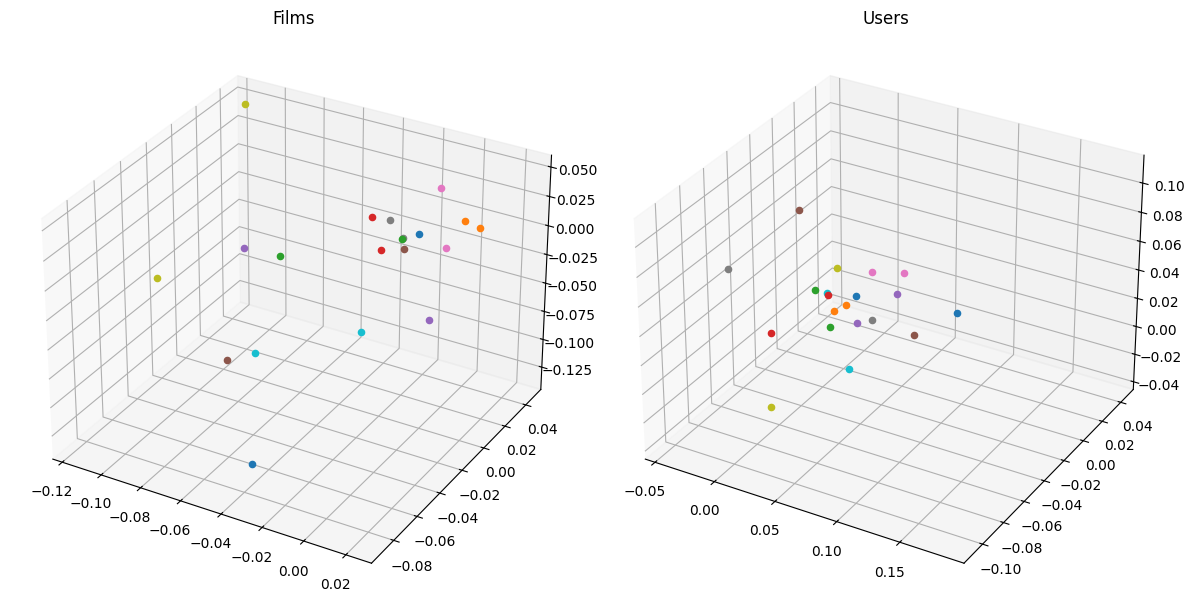

In [7]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(122, projection='3d')
num_users_to_plot = 20
for i in range(min(num_users_to_plot, U.shape[0])):
    ax.scatter(U[i, 0], U[i, 1], U[i, 2])

ax.set_title('Users')

V = Vt.T
ax2 = fig.add_subplot(121, projection='3d')
num_films_to_plot = 20
for i in range(min(num_films_to_plot, V.shape[0])):
    ax2.scatter(V[i, 0], V[i, 1], V[i, 2])

ax2.set_title('Films')

plt.tight_layout()
plt.show()

In [8]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [9]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)

In [10]:
difference = ratings_matrix_filled - preds_df
print("Difference between original and predicted ratings:\n", difference)

Difference between original and predicted ratings:
 movieId    1         2         3         5         6         7         10      \
userId                                                                          
1        0.859826 -0.356172  0.995921 -0.100322  0.979107  0.089389 -0.536949   
2        0.003789  0.031234 -0.029976 -0.024557  0.058762  0.019328  0.042859   
3        0.064410 -0.027061  0.027107  0.001808  0.012887  0.058863 -0.098682   
4       -1.151191  0.032223 -0.105694 -0.129922 -0.006222 -0.110855  0.033338   
5        0.911600 -0.284529 -0.158491 -0.105361 -0.323140 -0.182023 -0.118138   
...           ...       ...       ...       ...       ...       ...       ...   
606      0.329301 -0.069438  0.139567  0.053652 -0.601403 -0.273798  0.130459   
607      0.525033 -0.446672 -0.252604  0.041074 -0.340821 -0.026457 -0.311884   
608      0.117542 -0.435066 -0.329106  0.202003 -1.876386  0.165973  0.483087   
609      0.320763 -0.200044 -0.090433 -0.077264 -0.106414

In [11]:
predicted_only_df = preds_df.mask(~ratings_matrix.isna())
print("Predicted only ratings:\n", predicted_only_df)

Predicted only ratings:
 movieId    1         2         3         5         6         7         10      \
userId                                                                          
1             NaN  2.856172       NaN  2.600322       NaN  2.410611  3.036949   
2        2.496211  2.468766  2.529976  2.524557  2.441238  2.480672  2.457141   
3        2.435590  2.527061  2.472893  2.498192  2.487113  2.441137  2.598682   
4        3.651191  2.467777  2.605694  2.629922  2.506222  2.610855  2.466662   
5             NaN  2.784529  2.658491  2.605361  2.823140  2.682023  2.618138   
...           ...       ...       ...       ...       ...       ...       ...   
606           NaN  2.569438  2.360433  2.446348  3.101403       NaN  2.369541   
607           NaN  2.946672  2.752604  2.458926  2.840821  2.526457  2.811884   
608           NaN       NaN       NaN  2.297997  4.376386  2.334027       NaN   
609           NaN  2.700044  2.590433  2.577264  2.606414  2.568319       NaN   
610

In [12]:
movies_df = pd.read_csv('movies.csv')

In [13]:
user_id = 1

In [15]:
user_row_number = user_id - 1

In [18]:
user_data = ratings_matrix.loc[user_id]
user_full = user_data[user_data.notna()].index.tolist()

In [19]:
sorted_user_predictions = predicted_only_df.iloc[user_row_number].sort_values(ascending=False)

In [25]:
recommendations = (movies_df[~movies_df['movieId'].isin(user_full)]
                   .merge(pd.DataFrame(sorted_user_predictions).reset_index().rename(columns={user_row_number: 'Predictions'}), on='movieId')
                   .rename(columns={user_row_number: 'Predictions'})
                   .sort_values('Predictions', ascending=False)
                   .iloc[:10, :-1])

KeyError: 'Predictions'